<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Regression/Predicting_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import required libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf

Preprocessing

In [6]:
# Fetch historical market data using yfinance
df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Feature Engineering: Use Open, High, Low, Volume as features
df['Open1'] = df['Open'].shift(1)
df['High1'] = df['High'].shift(1)
df['Low1'] = df['Low'].shift(1)
df['Volume1'] = df['Volume'].shift(1)

# Drop missing values
df = df.dropna()

# Define features and target
X = df[['Open1', 'High1', 'Low1', 'Volume1']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[*********************100%***********************]  1 of 1 completed


Model Building

In [7]:

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
predictions = model.predict(X_test)

# Print the mean squared error of the model
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")


Mean Squared Error: 9.695582174146889


Analyzing

In [8]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print(df.head())

# Display dataset information (like count, mean, min, max, etc)
print(df.describe())


                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.634850  146322800   
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.213631  118387200   
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.869301  108872000   
2020-01-08  74.290001  76.110001  74.290001  75.797501  74.041496  132079200   
2020-01-09  76.809998  77.607498  76.550003  77.407501  75.614189  170108400   

                Open1      High1       Low1      Volume1  
Date                                                      
2020-01-03  74.059998  75.150002  73.797501  135480400.0  
2020-01-06  74.287498  75.144997  74.125000  146322800.0  
2020-01-07  73.447502  74.989998  73.187500  118387200.0  
2020-01-08  74.959999  75.224998  74.370003  108872000.0  
2020-01-09  74.290001  76.110001  74.290001  132079200.0  
             Open        H

<Axes: >

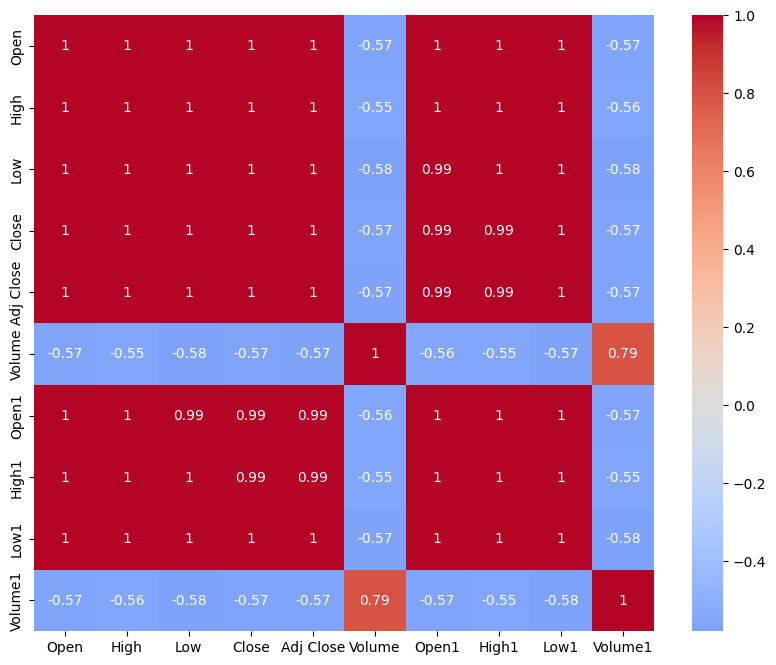

In [9]:
# Plot a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


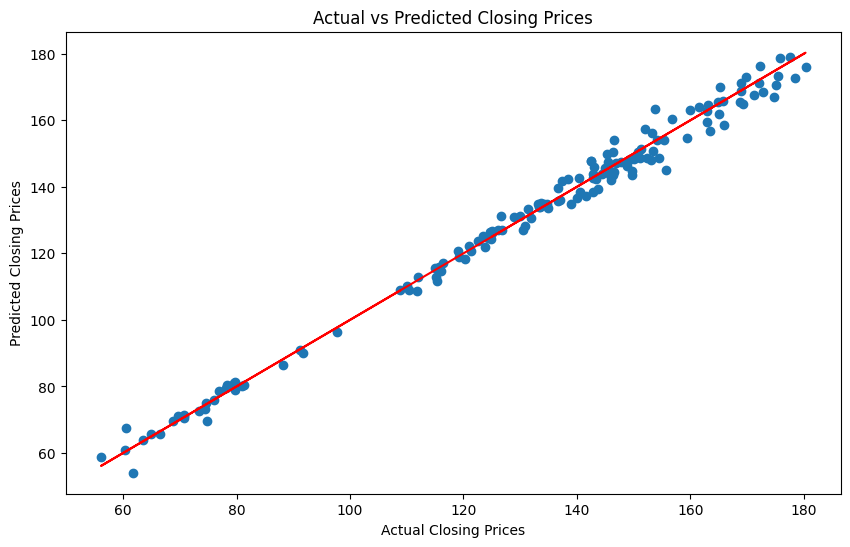

In [10]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Closing Prices")
plt.ylabel("Predicted Closing Prices")
plt.title("Actual vs Predicted Closing Prices")

# Display the plot
plt.show()


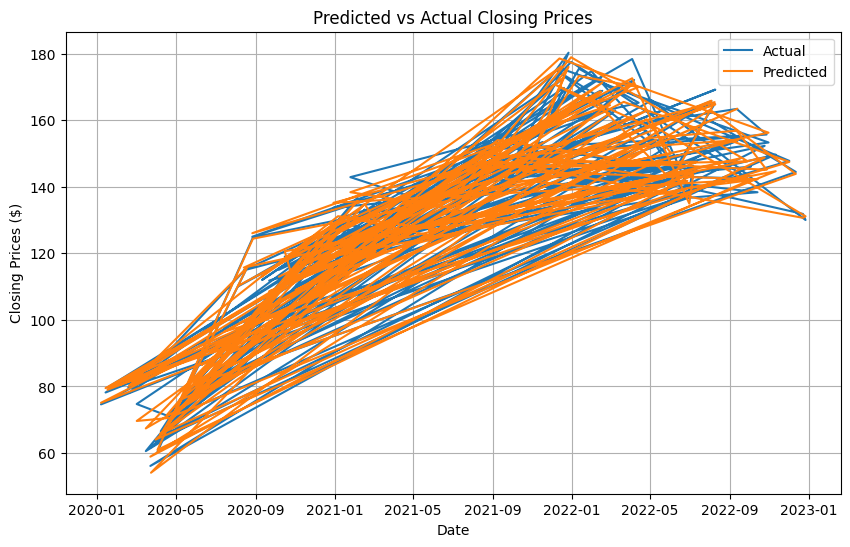

In [11]:
# Plot the predictions vs the actual values
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(y_test.index, y_test, label='Actual')
ax.plot(y_test.index, predictions, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Closing Prices ($)")
plt.title("Predicted vs Actual Closing Prices")
plt.legend()
plt.grid(True)
plt.show()